<a href="https://colab.research.google.com/github/SirYwain/BERT_celpebras/blob/main/braveALBERTina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rouge
!pip install rouge_score
!pip install pyspellchecker
from rouge import Rouge

from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from spellchecker import SpellChecker
import re
from rouge import Rouge
import seaborn as sns
import pandas as pd

!pip uninstall nltk

!pip install -U nltk

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from collections import Counter

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=6ea43f30eb083fae3bc973525d7491ca11ca39a18cd2dfb5b499f508d7da062d
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.3 MB/s eta 0:00:00
Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.12/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.12/dist-packages/nltk/*
Proceed (Y/n)? Y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Abre janela para escolher arquivos
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("celpebras_corpus.csv")
df.head()




Saving celpebras_corpus.csv to celpebras_corpus.csv


,file_name,text,label
0,20152t4p1166n0r.docx,É inaceitável e constrangedor a violência que ...,0
1,20152t4p1305n0r.docx,A capital paraense já foi considerada uma das ...,0
2,20152t4p1477n0r.docx,A prefeitura municipal respeitosa. ...,0
3,20152t4p1506n0r.docx,Data: 20/10/2015\nDe: Bibiana C. Terra\nPara: ...,0
4,20152t4p1512n0r.docx,Desculpe. Eu não conheco-me a matéria “Azulejo...,0


In [ ]:
uploaded = files.upload()

import analise_predicao

Saving analise_predicao.py to analise_predicao.py


/content/analise_predicao.py:112: SyntaxWarning: invalid escape sequence '\M'
  ax.set_title(f"\Média de erros de ortográfia:")


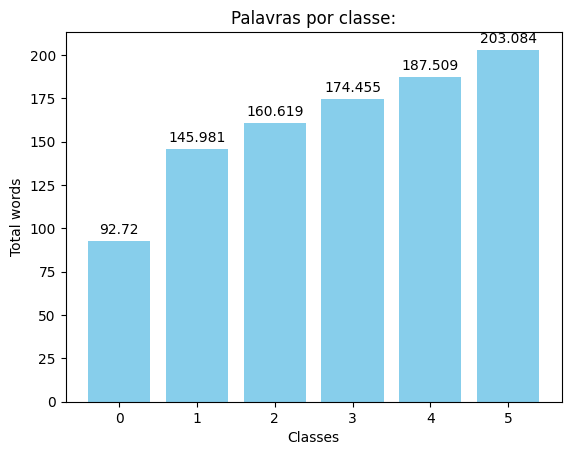

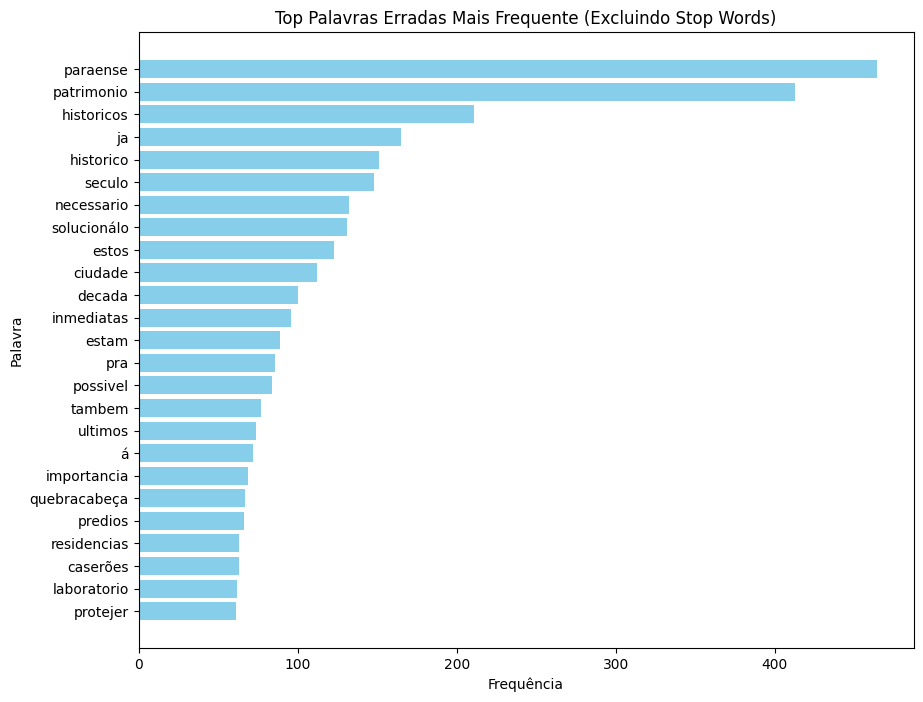

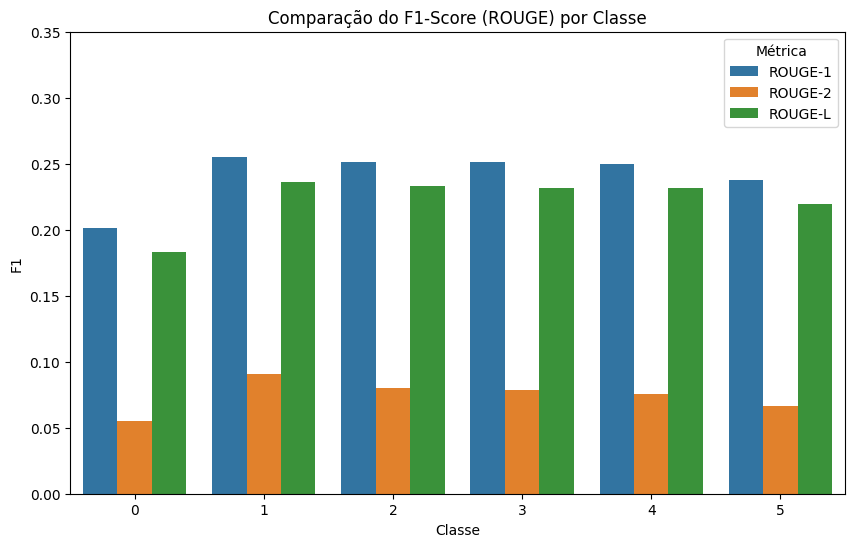

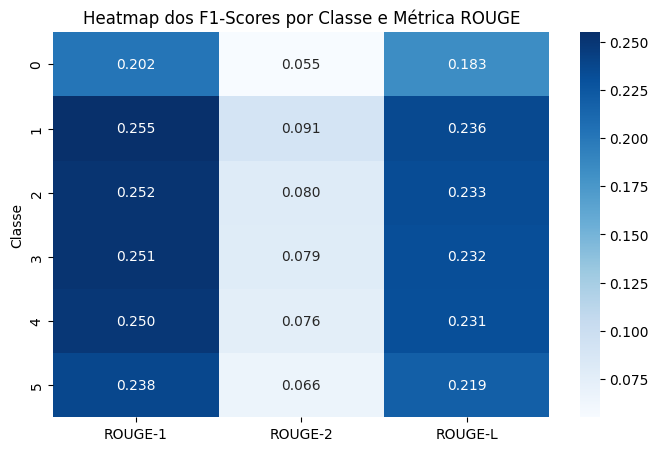

In [ ]:
paragrafo_alvo = "Capital paraense já foi uma das cidades brasileiras com maior variedade de azulejos valiosos, boa parte importada da Europa, na virada do século XIX para o XX. Da década de 1970 para cá, mais de 50% dos azulejos se perderam. Casarões estão sendo alvos de depredação e de vandalismo, como o caso do Palacete Vitor Maria da Silva. O Departamento do Patrimônio Histórico, Artístico e Cultural (Dphac) iniciou o processo de tombamento do casarão. Desde fevereiro, quatro casarões tiveram azulejos do século XIX furtados. Há quem suspeite de encomenda de roubos. Tudo indica que há um mercado de azulejos na cidade. Os exemplares fora das áreas tombadas não têm qualquer proteção. "

analise_predicao.word_count_by_label(df,"label")
analise_predicao.most_mispelled_words(df,25)
analise_predicao.copy_analysis_by_label(df,paragrafo_alvo,"label")


In [ ]:
 """ from imblearn.under_sampling import RandomUnderSampler
 from collections import Counter
 y = df['label']
 target_class = 3
 minority_class_size = Counter(y)[2]
 sampling_strategy = {target_class: minority_class_size}
 rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
 df, y = rus.fit_resample(df, y)
 df = df[df['label'] != 0].copy()
 df.groupby(['label']).count() """

" from imblearn.under_sampling import RandomUnderSampler\nfrom collections import Counter\ny = df['label']\ntarget_class = 3\nminority_class_size = Counter(y)[2]\nsampling_strategy = {target_class: minority_class_size}\nrus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)\ndf, y = rus.fit_resample(df, y)\ndf = df[df['label'] != 0].copy()\ndf.groupby(['label']).count() "

In [ ]:
!pip install imblearn

In [ ]:
!pip install torch --no-cache-dir

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
import torch
from transformers import TFAutoModel, AutoTokenizer, BertModel, BertTokenizer, BertForSequenceClassification, AutoModelForSequenceClassification
from datasets import load_dataset



model_name = "PORTULAN/albertina-900m-portuguese-ptbr-encoder"

# Carregar modelo e tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=df.label.nunique())
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at PORTULAN/albertina-900m-portuguese-ptbr-encoder and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spm.model:   0%|          | 0.00/2.45M [00:00<?, ?B/s]

In [ ]:
!pip install tensorflow

In [ ]:
df.groupby(['label']).count()

,file_name,text,total_words,text_normalized
label,,,,
0,25,25,25,25
1,211,211,211,211
2,628,628,628,628
3,715,715,715,715
4,477,477,477,477
5,237,237,237,237


In [ ]:
from sklearn.model_selection import train_test_split

def stratified_train_val_split(df, percentage, target_column):
    train, val = train_test_split(
        df,
        test_size=percentage,
        stratify=df[target_column],
        random_state=42
    )
    return train, val


# Use new_df which contains the 'label' column
train_df, valid_df = stratified_train_val_split(df, 0.3, target_column='label')

valid_df, test_df = stratified_train_val_split(valid_df, 1/3, target_column='label')

print("Tamanhos dos conjuntos:")
print(f"Treino: {len(train_df)}")
print(f"Validação: {len(valid_df)}")
print(f"Teste: {len(test_df)}")

Tamanhos dos conjuntos:
Treino: 1605
Validação: 458
Teste: 230


In [ ]:
train_df.groupby(['label']).count()

,file_name,text,total_words,text_normalized
label,,,,
0,17,17,17,17
1,148,148,148,148
2,440,440,440,440
3,500,500,500,500
4,334,334,334,334
5,166,166,166,166


In [ ]:
import transformers
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
from datasets import Dataset, DatasetDict
from transformers import BertTokenizer, BertForSequenceClassification

train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(valid_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], max_length=512, truncation=True, padding='max_length')

train_dataset_tokenized = train_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])
eval_dataset_tokenized = eval_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])
test_dataset_tokenized = test_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])

Map:   0%|          | 0/1605 [00:00<?, ? examples/s]

Map:   0%|          | 0/458 [00:00<?, ? examples/s]

Map:   0%|          | 0/230 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# 4. Configurar o Trainer e os parâmetros de treino
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    # print(preds)
    f1_mi = f1_score(labels, preds, average='micro')
    f1_ma = f1_score(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1-macro': f1_ma,
        'f1-micro': f1_mi
    }


#setando os hiperparâmetros POR EPOCA
batch_size = 5
epochs = 6
learning_rate = 2e-05
steps_per_epoch = round(len(train_dataset_tokenized) / batch_size)
print(len(train_dataset_tokenized), len(train_dataset_tokenized), steps_per_epoch)

training_args = TrainingArguments(
    output_dir='test_trainer',
    overwrite_output_dir=True,
    eval_strategy='epoch',
    save_strategy ='epoch',
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    logging_steps=20,
    report_to="none",
    learning_rate=learning_rate,
    num_train_epochs = epochs,
    load_best_model_at_end = True,
    #   report_to='tensorboard'
        )

1605 1605 321


In [ ]:
from transformers import Trainer, TrainingArguments
from transformers.trainer_callback import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tokenized,
    eval_dataset=eval_dataset_tokenized,
    compute_metrics=compute_metrics,
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=8)],

)



In [ ]:
import os


trainer.train()




OutOfMemoryError: CUDA out of memory. Tried to allocate 120.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 12.12 MiB is free. Process 2384 has 14.73 GiB memory in use. Of the allocated memory 14.54 GiB is allocated by PyTorch, and 62.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
trainer.evaluate()
results = trainer.evaluate()

df = pd.DataFrame([results])
csv_path = "result_bertimbau_opti.csv"
df.to_csv(csv_path, index=False)


In [ ]:
 print(results)

In [ ]:
 uploaded = files.upload()
 sample = pd.read_csv("cartas_belem_gpt.csv")
 sample.head()


 sample_dataset = Dataset.from_pandas(sample)
 sample_dataset_tokenized = sample_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])

In [ ]:
 #fazendo a inferência para as instâncias de teste
 p = trainer.predict(test_dataset_tokenized)
 pred_output = p[2]
 #imprimindo as métricas de avaliação
 pred_output['test_accuracy'], pred_output['test_f1-macro']

In [ ]:
 #fazendo a inferência para as instâncias de teste
 p2 = trainer.predict(sample_dataset_tokenized)
 pred_output2 = p2[2]
 #imprimindo as métricas de avaliação
 pred_output2['test_accuracy'], pred_output2['test_f1-macro']

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicoes = p[0].argmax(-1)
true_values = list(test_dataset_tokenized['label'])
acc = accuracy_score(true_values, predicoes)
f1ma = f1_score(true_values, predicoes, average='macro')
print(f'Accuracy: {acc:.3f} \t F1-macro: {f1ma:.3f}')

cm = confusion_matrix(true_values, predicoes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(train_df.label.unique()))
cm_display.plot()
plt.show()

In [ ]:
 import numpy as np
 import pandas as pd
 preds = np.argmax(p.predictions, axis=1)
 test_df["predicted_label"] = preds
 test_df["predicted_label"] = test_df["predicted_label"].map({0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5"})
 test_df

In [ ]:
 preds_sample = np.argmax(p2.predictions, axis=1)
 sample["predicted_label"] = preds_sample
 sample["predicted_label"] = sample["predicted_label"].map({0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5"})
 sample

In [ ]:
# Sua resposta aqui 🙂
from sklearn.model_selection import StratifiedKFold

df_complete = pd.concat([train_df, valid_df, test_df], ignore_index=True)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kfold_result = []

In [ ]:
# Sua resposta aqui 🙂

for train_index, test_index in skf.split(df_complete, df['label']):
        X_train, X_test = df_complete.loc[train_index], df_complete.loc[test_index]
        y_train, y_test = df_complete['label'].loc[train_index], df_complete['label'].loc[test_index]
        print("TRAIN:", len(train_index), "TEST:", len(test_index))

        train_dataset = Dataset.from_pandas(X_train)
        test_dataset = Dataset.from_pandas(X_test)

        train_dataset_tokenized = train_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])
        test_dataset_tokenized = test_dataset.map(tokenize_function, batched=True, remove_columns=['file_name','text'])

        #model = BertForSequenceClassification.from_pretrained("neuralmind/bert-large-portuguese-cased", num_labels=df_complete.label.nunique())

        trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset_tokenized,
        eval_dataset=test_dataset_tokenized,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
        )

        trainer.train()
        trainer.evaluate()

        p = trainer.predict(test_dataset_tokenized)
        pred_output = p[2]

        kfold_result.append(pred_output)